---
# 1. Perkenalan

Nama : Adnan Rio

Batch : FTDS-014

Dataset : heart.csv

Objective : Buatlah model machine learning untuk mengklasifikasikan kemungkinan orang terkena serangan jantung. Bandingkan antara model Decision Tree dan Random Forest. Analisa dua buah model ini dan tentukan model yang terbaik untuk data ini

---
# 2. Import Libraries

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [15]:
#Kolom import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder,StandardScaler


---
# 3. Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dl

In [16]:
#Data Loading
df = pd.read_csv('heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
#show tail data
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [18]:
# copy df untuk menjaga data asli
df_copy = df.copy()

In [19]:
# melihat persebaran data df, dan mengetahui masing-masing kolom di dalam df
df_copy.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [20]:
# melihat null vs non-null data df, untuk mengetahui missing value 
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


Tidak ada null data. Lanjutkan ke EDA untuk melihat isi data

---
# 4. Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, heatmap, central tendency dan lain sebagainya.

Target : target

In [21]:
#melihat unique value padatarget
df_copy.target.unique()

array([1, 0], dtype=int64)

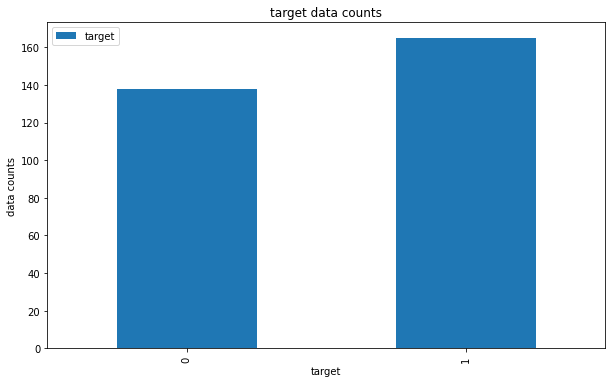

In [22]:
#groupby
df_copy.groupby(["target"])[["target"]].count().plot(kind='bar', figsize=(10, 6))
plt.xlabel('target') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target data counts') # add title to the plot

plt.show()

Perbedaan data pada target 0 dan target 1 tidak jauh. Sehingga bisa diasumsikan tidak akan memiliki pengaruh yang signifikan terhadap prediksi 

In [23]:
#membuat def perhitungan proportion, sebelum memasukkannya ke grafik
def make_dataplot_proportion(df3,grdf):
    col3 = []
    for i in df3.loc[:,0]:

        try:
            k = pd.Series.item(grdf.loc[i,0])
        except KeyError:
            k = 0
        
        try:
            b = pd.Series.item(grdf.loc[i,1])
        except KeyError:
            b=0

        try:
            col3.append(b/(b+k))
        except ZeroDivisionError:
            col3.append(0)
        
    df3['proportion'] = col3
    pd.DataFrame(df3)

Text(0.5, 1.0, 'target data berdasarkan umur')

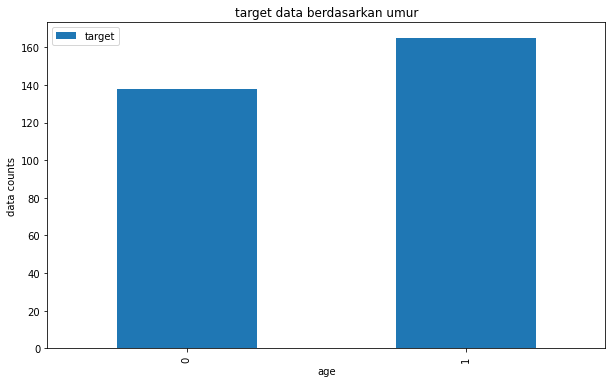

In [24]:
df_copy.groupby(["target"])[["target"]].count().plot(kind='bar', figsize=(10, 6))
plt.xlabel('age') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target data berdasarkan umur') # add title to the plot

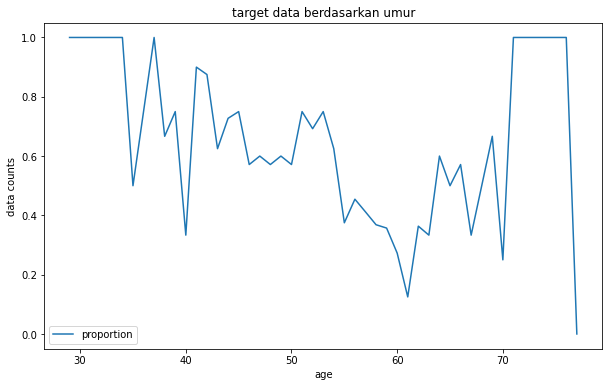

In [25]:
dataunique= pd.DataFrame(df_copy['age'].unique())
gruopeddf = df_copy.groupby(['age','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'age'}, inplace=True)
dataunique = dataunique.sort_values(by='age', ascending=True)
dataunique.set_index('age', inplace=True)

dataunique.plot(kind='line', figsize=(10, 6))

plt.xlabel('age') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target data berdasarkan umur') # add title to the plot

plt.show()

Proporsi pasien yang kemungkinan terkena serangan jantung menurun pada umur 40 - 70 tahun. Disini age memenuhi terget

Text(0.5, 1.0, 'target berdasarkan gender')

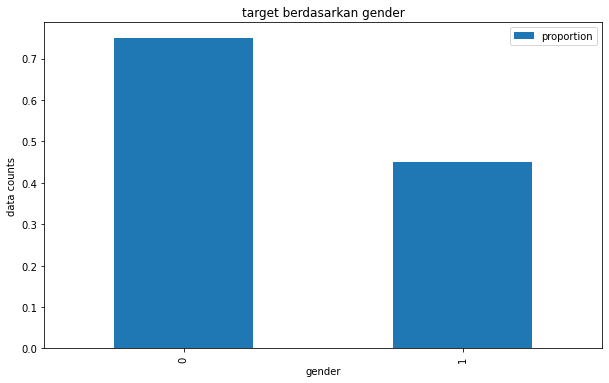

In [26]:
dataunique= pd.DataFrame(df_copy['sex'].unique())
gruopeddf = df_copy.groupby(['sex','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'age'}, inplace=True)
dataunique = dataunique.sort_values(by='age', ascending=True)
dataunique.set_index('age', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('gender') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target berdasarkan gender') # add title to the plot

sex ( 0 = female 1 = male), proporsi gender male sedikit mengalami kemungkinan terkena serangan jantung dibanding female. Gender mempengaruhi target

Text(0.5, 1.0, 'target berdasarkan cp')

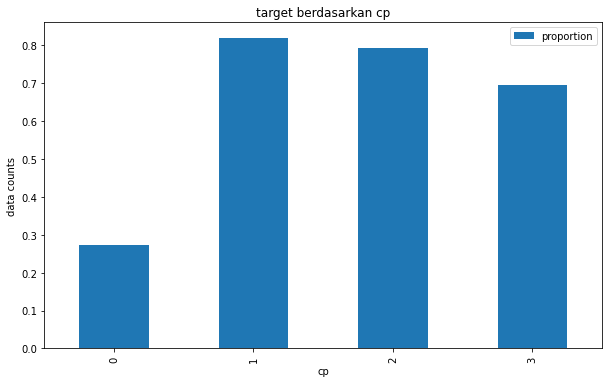

In [27]:
dataunique= pd.DataFrame(df_copy['cp'].unique())
gruopeddf = df_copy.groupby(['cp','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'cp'}, inplace=True)
dataunique = dataunique.sort_values(by='cp', ascending=True)
dataunique.set_index('cp', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('cp') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target berdasarkan cp') # add title to the plot

chest pain type dimana proposi cp 0 lebih sedikit kemungkinnan terekana serangan jauntug. cp memenuhi target

Text(0.5, 1.0, 'target berdasarkan tesrtbps')

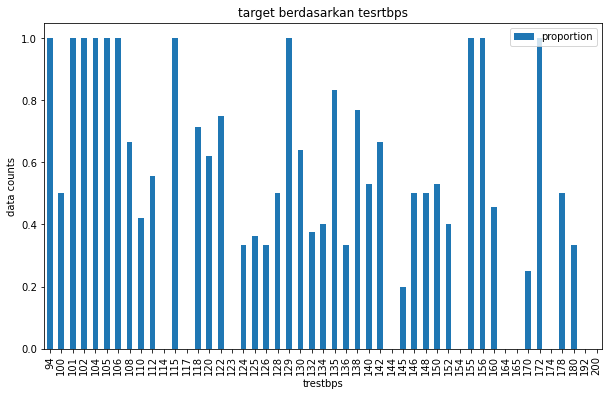

In [28]:
dataunique= pd.DataFrame(df_copy['trestbps'].unique())
gruopeddf = df_copy.groupby(['trestbps','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'trestbps'}, inplace=True)
dataunique = dataunique.sort_values(by='trestbps', ascending=True)
dataunique.set_index('trestbps', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('trestbps') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target berdasarkan tesrtbps') # add title to the plot

trestbpd :  resting blood pressure mengalami penurunan  145 dan 154. trestbpd mempengaruhi target

Text(0.5, 1.0, 'target berdasarkan ca')

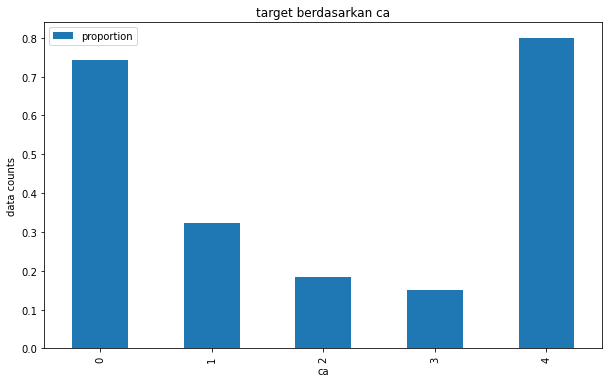

In [29]:
dataunique= pd.DataFrame(df_copy['ca'].unique())
gruopeddf = df_copy.groupby(['ca','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'ca'}, inplace=True)
dataunique = dataunique.sort_values(by='ca', ascending=True)
dataunique.set_index('ca', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('ca') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target berdasarkan ca') # add title to the plot

Proporsi kemungkinan terkena serangan jantun menurun pada ca 1 - 3 mempengarhui target

Text(0.5, 1.0, 'target berdasarkan thal')

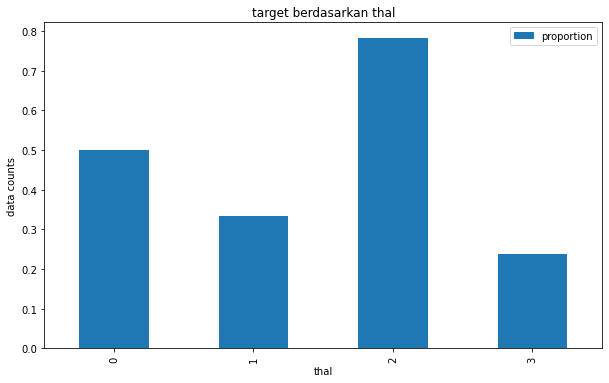

In [30]:
dataunique= pd.DataFrame(df_copy['thal'].unique())
gruopeddf = df_copy.groupby(['thal','target'])[["target"]].count()

make_dataplot_proportion(dataunique,gruopeddf)

dataunique.rename(columns={ 0 : 'thal'}, inplace=True)
dataunique = dataunique.sort_values(by='thal', ascending=True)
dataunique.set_index('thal', inplace=True)

dataunique.plot(kind='bar', figsize=(10, 6))

plt.xlabel('thal') # add to x-label to the plot
plt.ylabel('data counts') # add y-label to the plot
plt.title('target berdasarkan thal') # add title to the plot

Proposi pasien terkena serangan jantung menurun pada kategori 0, 1 dan 3. Thal mempengaruhi target

#   5. Data Preprocessing

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-dev-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## Get Data for Model Inference

In [31]:
df_copy.shape

(303, 14)

In [32]:
#Get data inference sebanyak 30 row sample dan lock randomize.
df_inf = df_copy.sample(10, random_state = 15)
df_inf.shape

(10, 14)

In [33]:
# Hapus data yang dipakai oleh data inference dari df
df_trts = df_copy.drop(df_inf.index)

# Cek ukuran dataset untuk train dan test:
df_trts.shape

(293, 14)

In [34]:
# Reset index dari kedua dataframe inference dan data untuk train & test
df_inf.reset_index(drop = True, inplace=True)
df_trts.reset_index(drop = True, inplace=True)

## Splitting Dataset, y-X and train-test

In [35]:
#Splitting dataset X adalah feature dan y adalah target
X = df_trts.drop('target', axis = 1)
y = df_trts['target']

In [36]:
#Splitting dataset menjadi 80% untuk train dan 20% untuk test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [37]:
#Cek ukuran dataset train dan test untuk memastikan proporsi
print('Train set size: ', X_train.shape)
print('Test set size: ', X_test.shape)

Train set size:  (234, 13)
Test set size:  (59, 13)


## Feature Selection

Feature Selection dilakukan sebelum data preprocessing untuk mempersempit cakupan preprocessing data sehingga dapat mengurangi waktu pengolahan data dan menghindari mengolah data yang pada akhirnya tidak terpakai.

In [38]:
#Display X_train to see the features
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
71,51,1,0,140,261,0,0,186,1,0.0,2,0,2
282,58,0,0,170,225,1,0,146,1,2.8,1,2,1
255,66,1,0,112,212,0,0,132,1,0.1,2,1,2
109,55,1,1,130,262,0,1,155,0,0.0,2,0,2
106,57,1,2,150,126,1,1,173,0,0.2,2,1,3


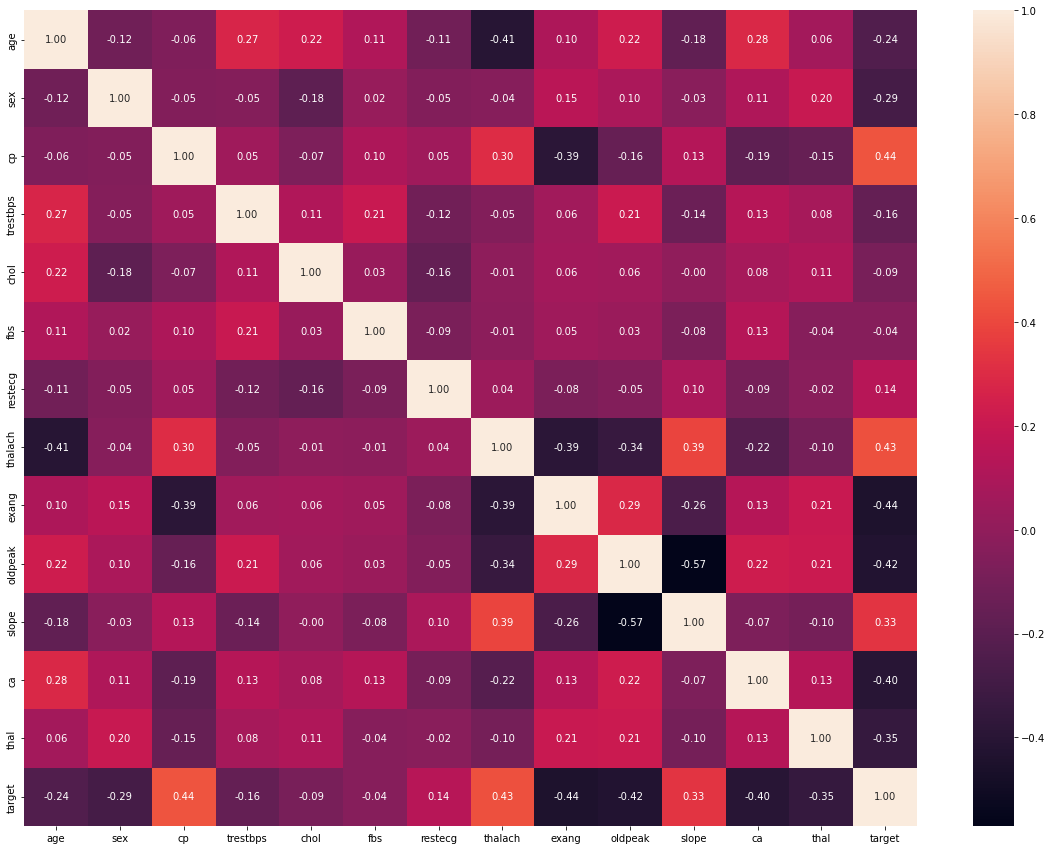

In [39]:
# Use heatmap for identifying correlation between numeric features
plt.figure(figsize=(20,15))
sns.heatmap(df_trts.corr(), annot=True, fmt='.2f')
plt.show()

Heatmap menjelaskan semua kolom mempunyai korelasi dengan 'target' dengan 'chol', ''fbs', 'restecg nilai terendah'

In [40]:
#create classifier with n estimator = 100
featimpt = RandomForestClassifier(n_estimators= 100, random_state=15)

#fit to the data
featimpt.fit(X_train,y_train)

#simpan hasil dan buat menjadi dataframe
scorepercolumn = pd.Series(featimpt.feature_importances_, index = X_train.columns)
scorepercolumn.sort_values(ascending=False)

cp          0.148295
thalach     0.128689
thal        0.127675
ca          0.106026
oldpeak     0.096624
age         0.088515
exang       0.076069
chol        0.071697
trestbps    0.051948
slope       0.047937
sex         0.029988
restecg     0.016031
fbs         0.010506
dtype: float64

In [41]:
X_train_fs = X_train.loc[:,['age','sex', 'cp','trestbps','chol','thalach','exang','oldpeak','slope','ca','thal']]
X_test_fs = X_test.loc[:,['age','sex', 'cp','trestbps','chol','thalach','exang','oldpeak','slope','ca','thal']]
X_test_fs.head(3)

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
97,59,1,3,178,270,145,0,4.2,0,0,3
124,74,0,1,120,269,121,1,0.2,2,1,2
115,64,0,0,130,303,122,0,2.0,1,2,2


## Missing value handling

In [42]:
# Looking missing value in X_train
X_train_fs.isnull().sum().sum()

0

In [43]:
# Looking missing value in X_test
X_test_fs.isnull().sum().sum()

0

In [44]:
# Looking missing value in y_train
y_train.isnull().sum().sum()

0

In [45]:
# Looking missing value in y_test
y_test.isnull().sum().sum()

0

Cek unique value setiap kolom

In [46]:
for i in X_train.columns:
    print(i,":")
    print(X_train[i].unique())

age :
[51 58 66 55 57 54 63 60 59 53 64 42 45 43 40 48 49 47 67 62 41 65 44 76
 70 52 46 56 50 35 71 61 77 34 39 38 68 29 37 69]
sex :
[1 0]
cp :
[0 1 2 3]
trestbps :
[140 170 112 130 150 110 128 134 138 120 115 122 118 135 152 142 154 146
 124 180 125 172 145 114 108 160 200 132 100 105 178 136 164 106 129 174
 102  94 192 104 126 117 148 165 101]
chol :
[261 225 212 262 126 214 303 195 253 204 234 227 209 260 167 222 160 149
 295 304 229 277 274 315 226 232 294 278 326 250 219 275 197 322 286 394
 327 230 231 249 407 256 192 199 284 243 266 244 265 240 205 168 239 335
 166 174 293 223 187 246 267 264 308 309 318 220 177 330 258 242 157 188
 269 282 302 288 342 268 182 313 213 254 172 245 216 198 236 131 180 233
 247 271 263 210 201 175 353 183 228 319 176 186 276 196 289 203 211 255
 283 206 235 299 193 270 305 417 354 184 311 340 248 300 169 221 298 208
 409 281 178 273 215 252 325 290 341 360 218 307]
fbs :
[0 1]
restecg :
[0 1 2]
thalach :
[186 146 132 155 173 158 159 179 144 162 

terdapat data mencurigakan, yakni ca dan thal yang tidak sesuai data deskripsi. Sesuai dengan EDA, data akan digunakan as it is. Tidak terdapat missing value pada kedua dataset. Proceed ke outlier handling.

## Split between Numerical Columns and Categorical Columns

Data Splitting antara kolom kategori dan numerical dilakukan sebelum outlier untuk memudahkan outlier handling, baik dari sisi grafik dan pengihitungan outlier.

In [47]:
X_train_fs

,age,sex,cp,trestbps,chol,thalach,exang,oldpeak,slope,ca,thal
71,51,1,0,140,261,186,1,0.0,2,0,2
282,58,0,0,170,225,146,1,2.8,1,2,1
255,66,1,0,112,212,132,1,0.1,2,1,2
109,55,1,1,130,262,155,0,0.0,2,0,2
106,57,1,2,150,126,173,0,0.2,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
199,59,1,0,140,177,162,1,0.0,2,1,3
155,38,1,2,138,175,173,0,0.0,2,4,2
156,38,1,2,138,175,173,0,0.0,2,4,2
133,51,0,2,120,295,157,0,0.6,2,0,2


In [48]:
#Memilih feature numerical dan categorical

num_col = ['age','trestbps','chol','thalach','oldpeak']
cat_col = ['sex','cp','exang','slope','ca','thal']

In [49]:
# Split data set sesuai dengan categorical dan numerical
X_train_num = X_train_fs[num_col]
X_train_cat = X_train_fs[cat_col]

X_test_num = X_test_fs[num_col]
X_test_cat = X_test_fs[cat_col]

In [50]:
#show Xtrain num
X_train_num.head(3)

,age,trestbps,chol,thalach,oldpeak
71,51,140,261,186,0.0
282,58,170,225,146,2.8
255,66,112,212,132,0.1


In [51]:
#show Xtrain cat
X_train_cat.head(3)

,sex,cp,exang,slope,ca,thal
71,1,0,1,2,0,2
282,0,0,1,1,2,1
255,1,0,1,2,1,2


## Outliers handling

In [52]:
# Membuat def fungsi untuk membuat histogram dan boxplot bagi numerical X_train 
def hist_boxplot(df, variable):
    # Define figure size
    plt.figure(figsize=(10, 3))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

    print('skewness:', df[variable].skew())
    if (df[variable].skew() <= -0.5 ) | (df[variable].skew() >= 0.5 ) :
      print('the distribution is skewed')
    else:
      print('the distribution is normal')

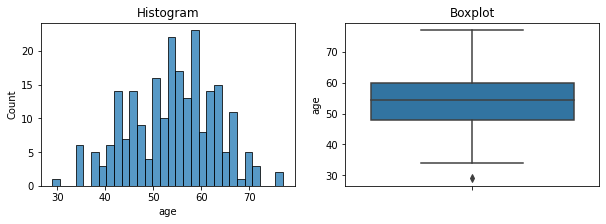

skewness: -0.18848276307563616
the distribution is normal


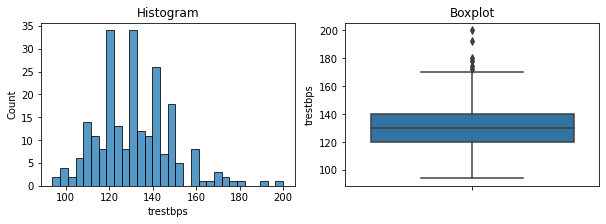

skewness: 0.698193611806609
the distribution is skewed


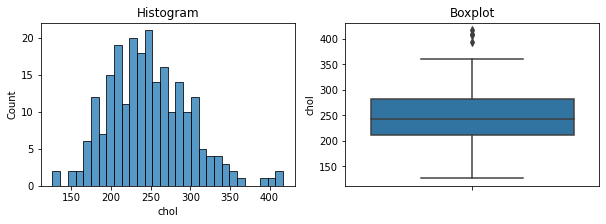

skewness: 0.49548098151460346
the distribution is normal


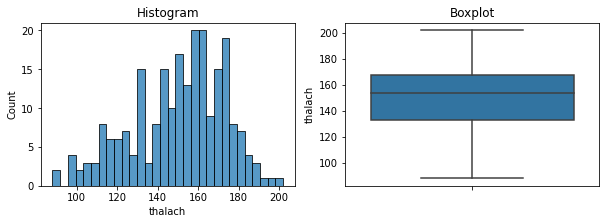

skewness: -0.4927186006011542
the distribution is normal


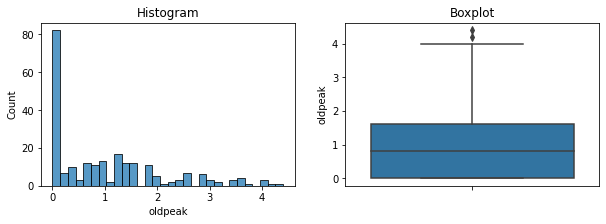

skewness: 1.0493555158304804
the distribution is skewed


In [53]:
#munculkan histogram dan boxplot bagi ketiga feature di X_Traim_num
for i in num_col:
    hist_boxplot(X_train_num, i)

Data yang meiliki distribusi normal age, chol, thalach dan yang skew trestbps,oldpean. Terliihat trestbps, chol, oldpeak dan age mempunyai outlier namun asumsi saya itu sebagai natural outlier karena bisa saja age pesertanya memiliki usia yang tinggi

Scaling akan dilakukan dengan menggunakan pipeline bersama encoding, menggunakan minmaxscaler dan standardscaler dikarenakan sebagian feature yang terdapat dalam numerik memiliki distribusi skewed dan sebagian normal.

## Feature Encoding

Encoding akan dilakukan dengan menggunakan pipeline bersama scaling, menggunakan onehotencoder dikarenakan semua kategori tidak dalam bentuk ordinal.

## Concate between Numerical Columns and Categorical Columns

In [54]:
#Satukan kedua dataset train dan test dari num dan category
X_train_fin = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_fin = pd.concat([X_test_num, X_test_cat ], axis=1)
X_train_fin

,age,trestbps,chol,thalach,oldpeak,sex,cp,exang,slope,ca,thal
71,51,140,261,186,0.0,1,0,1,2,0,2
282,58,170,225,146,2.8,0,0,1,1,2,1
255,66,112,212,132,0.1,1,0,1,2,1,2
109,55,130,262,155,0.0,1,1,0,2,0,2
106,57,150,126,173,0.2,1,2,0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...
199,59,140,177,162,0.0,1,0,1,2,1,3
155,38,138,175,173,0.0,1,2,0,2,4,2
156,38,138,175,173,0.0,1,2,0,2,4,2
133,51,120,295,157,0.6,0,2,0,2,0,2


Semua data berhasil di concat (num dan cat)

---
# 6. Model definition

Notes :

Algoritma yang dipake adalah
- Decision Tree
- Random Forest

Bandingkan antara model Decision Tree dan Random Forest

In [55]:
#state num dan cat cols, serta bagi cat cols menjadi ordinal dan nominal
num_skewcol = ['trestbps','oldpeak']
num_normcol = ['age','chol','thalach']
cat_col = ['sex','cp','slope','ca','thal']

In [56]:
#persiapkan column transformer untuk membedakan proses per kolom
preprocess = ColumnTransformer([
    ('numskew', MinMaxScaler(),num_skewcol),
    ('catnom', StandardScaler(),num_normcol),
    ('catord', OneHotEncoder(handle_unknown='ignore'),cat_col)
])

In [57]:
#persiapkan pipeline Decission Tree
prepmod_DT = Pipeline([
    ('preprop', preprocess),
    ('DecTree', DecisionTreeClassifier())
    ])

In [58]:
#persiapkan pipeline Random Forest
prepmod_RF = Pipeline([
    ('preprop', preprocess),
    ('RFC',RandomForestClassifier())
    ])


---
# 7. Model Training

Model training akan dilakukan sekalian dengan grid search.

---
# 8. Model Evaluation

In [59]:
#buat dataframe untuk menampung hasil evaluasi
resulteval = pd.DataFrame(('DT','RF'))
resulteval.rename(columns ={0:'model'},inplace=True)
resulteval['mean']=[0,0]
resulteval['stddev']=[0,0]
resulteval['lower']=[0,0]
resulteval['upper']=[0,0]
resulteval

,model,mean,stddev,lower,upper
0,DT,0,0,0,0
1,RF,0,0,0,0


In [60]:
#Lakukan eval untuk DT
a = np.mean(cross_val_score(prepmod_DT,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(prepmod_DT,X_train_fin,y_train,cv=10))
resulteval.loc[0,'mean']=a
resulteval.loc[0,'stddev']=b
resulteval.loc[0,'lower']=a-b
resulteval.loc[0,'upper']=a+b

In [61]:
#Lakukan eval untuk RF
a = np.mean(cross_val_score(prepmod_RF,X_train_fin,y_train,cv=10))
b = np.std(cross_val_score(prepmod_RF,X_train_fin,y_train,cv=10))
resulteval.loc[1,'mean']=a
resulteval.loc[1,'stddev']=b
resulteval.loc[1,'lower']=a-b
resulteval.loc[1,'upper']=a+b

In [62]:
resulteval

,model,mean,stddev,lower,upper
0,DT,0.764855,0.086102,0.678753,0.850957
1,RF,0.863587,0.066202,0.797385,0.929789


dari tabel di atas mean yang tinggi dan std dev yang rendah setiap model menunjukan performa yang baik menandakan memiliki sifat robust yang baik oleh karena itu kita menggunkan random forest

### Grid search decisiontree 

In [63]:
#buat parameter grid bagi decisiontree
param_gridDT = [{'DecTree__max_depth': [2,3],
               'DecTree__random_state': [15, 30]}]

In [64]:
#buat grid search lalu fit
gridDT = GridSearchCV(prepmod_DT, param_gridDT, cv=5)
gridDT.fit(X_train_fin,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['trestbps',
                                                                          'oldpeak']),
                                                                        ('catnom',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'chol',
                                                                          'thalach']),
                                                                        ('catord',
                                                                         OneH

In [65]:
#Cari best estimator bagi grid search tadi
print("Best estimator:\n{}".format(gridDT.best_estimator_))

Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['trestbps', 'oldpeak']),
                                                 ('catnom', StandardScaler(),
                                                  ['age', 'chol', 'thalach']),
                                                 ('catord',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'slope', 'ca',
                                                   'thal'])])),
                ('DecTree',
                 DecisionTreeClassifier(max_depth=3, random_state=15))])


In [66]:
#print best parameters
print("Best parameters: {}".format(gridDT.best_params_))

Best parameters: {'DecTree__max_depth': 3, 'DecTree__random_state': 15}


In [67]:
#print grid score
print("Test-set score: {:.2f}".format(gridDT.score(X_train_fin,y_train)))

Test-set score: 0.88


In [68]:
#lakukan predict menggunakan best parameter
y_train_predDT_best = gridDT.best_estimator_.predict(X_train_fin)
y_test_predDT_best = gridDT.best_estimator_.predict(X_test_fin)

In [69]:
#lakukan fit untuk base parameter
prepmod_DT.fit(X_train_fin,y_train)

Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['trestbps', 'oldpeak']),
                                                 ('catnom', StandardScaler(),
                                                  ['age', 'chol', 'thalach']),
                                                 ('catord',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'slope', 'ca',
                                                   'thal'])])),
                ('DecTree', DecisionTreeClassifier())])

In [70]:
#lakukan predict untuk base parameter
y_train_predDT_base = prepmod_DT.predict(X_train_fin)
y_test_predDT_base = prepmod_DT.predict(X_test_fin)

Bandingkan hasil accuracy score antara best parameter dengan base parameter

In [71]:
#print accuracy score best param DT
print('accuracy score train : ',accuracy_score(y_train,y_train_predDT_best))
print('accuracy score test : ',accuracy_score(y_test,y_test_predDT_best))

accuracy score train :  0.8803418803418803
accuracy score test :  0.711864406779661


In [72]:
#print accuracy score base param
print('accuracy score train : ',accuracy_score(y_train,y_train_predDT_base))
print('accuracy score test : ',accuracy_score(y_test,y_test_predDT_base))

accuracy score train :  1.0
accuracy score test :  0.6610169491525424


Akurasi score terlihat bahwa best parameter memiliki akurasi yang lebih baik dibanding best parameter, namun kedua model memiliki perbedaan antara nilai train dengan test. nilai test lebih kecil sehingga kedua model dinilai overfit

In [73]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train,y_train_predDT_best))
print('-----------test-------------')
print(classification_report(y_test,y_test_predDT_best))

-----------train-------------
              precision    recall  f1-score   support

           0       0.93      0.79      0.86       107
           1       0.85      0.95      0.90       127

    accuracy                           0.88       234
   macro avg       0.89      0.87      0.88       234
weighted avg       0.89      0.88      0.88       234

-----------test-------------
              precision    recall  f1-score   support

           0       0.75      0.62      0.68        29
           1       0.69      0.80      0.74        30

    accuracy                           0.71        59
   macro avg       0.72      0.71      0.71        59
weighted avg       0.72      0.71      0.71        59



In [74]:
#print classification report base param
print('-----------train-------------')
print(classification_report(y_train,y_train_predDT_base))
print('-----------test-------------')
print(classification_report(y_test,y_test_predDT_base))

-----------train-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       127

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234

-----------test-------------
              precision    recall  f1-score   support

           0       0.65      0.69      0.67        29
           1       0.68      0.63      0.66        30

    accuracy                           0.66        59
   macro avg       0.66      0.66      0.66        59
weighted avg       0.66      0.66      0.66        59



Pada baris 1 report train kolom recal diatas dengan nilai 1=1 artinya sangat aktual dengan dataset,yang berhasil positif terdeteksi dengan benar, untuk memperbesar akurasi diagnosa pasien penyakit jantung. Classification report diatas menyimpulkan bahwa best parameter memiiki nilai recall train, test yang lebih baik dibandiing dengan base parameter. Artinya best parameter memiliki performa yang lebih robust dibanding base parameter

### Grid Search Random Forest

In [75]:
#buat parameter grid bagi Random Forest
param_gridRF = [{'RFC__max_depth': [2,3],
               'RFC__random_state': [15, 30]}]


In [76]:
gridRF = GridSearchCV(prepmod_RF, param_gridRF, cv=5)
gridRF.fit(X_train_fin,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprop',
                                        ColumnTransformer(transformers=[('numskew',
                                                                         MinMaxScaler(),
                                                                         ['trestbps',
                                                                          'oldpeak']),
                                                                        ('catnom',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'chol',
                                                                          'thalach']),
                                                                        ('catord',
                                                                         OneH

In [77]:
#Cari best estimator bagi grid search tadi
print("Best estimator:\n{}".format(gridRF.best_estimator_))


Best estimator:
Pipeline(steps=[('preprop',
                 ColumnTransformer(transformers=[('numskew', MinMaxScaler(),
                                                  ['trestbps', 'oldpeak']),
                                                 ('catnom', StandardScaler(),
                                                  ['age', 'chol', 'thalach']),
                                                 ('catord',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex', 'cp', 'slope', 'ca',
                                                   'thal'])])),
                ('RFC', RandomForestClassifier(max_depth=2, random_state=15))])


In [78]:
#print best parameters
print("Best parameters: {}".format(gridRF.best_params_))


Best parameters: {'RFC__max_depth': 2, 'RFC__random_state': 15}


In [79]:
#print grid score
print("Test-set score: {:.2f}".format(gridRF.score(X_train_fin,y_train)))


Test-set score: 0.90


In [80]:
#lakukan predict menggunakan best parameter
y_train_predRF_best = gridRF.best_estimator_.predict(X_train_fin)
y_test_predRF_best = gridRF.best_estimator_.predict(X_test_fin)


In [81]:
#lakukan fit untuk base parameter
prepmod_RF.fit(X_train_fin,y_train)

#lakukan predict untuk base parameter
y_train_predRF_base = prepmod_RF.predict(X_train_fin)
y_test_predRF_base = prepmod_RF.predict(X_test_fin)



In [82]:
#print accuracy score best param RF
print('accuracy score train : ',accuracy_score(y_train,y_train_predRF_best))
print('accuracy score test : ',accuracy_score(y_test,y_test_predRF_best))

accuracy score train :  0.8974358974358975
accuracy score test :  0.7796610169491526


In [83]:
#print accuracy score base param
print('accuracy score train : ',accuracy_score(y_train,y_train_predRF_base))
print('accuracy score test : ',accuracy_score(y_test,y_test_predRF_base))


accuracy score train :  1.0
accuracy score test :  0.7457627118644068


Akurasi score terlihat bahwa best parameter memiliki akurasi yang lebih baik dibanding best parameter, namun kedua model memiliki perbedaan antara nilai train dengan test. nilai test lebih kecil sehingga kedua model dinilai overfit

In [84]:
#print classification report best param
print('-----------train-------------')
print(classification_report(y_train,y_train_predRF_best))
print('-----------test-------------')
print(classification_report(y_test,y_test_predRF_best))

-----------train-------------
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       107
           1       0.87      0.95      0.91       127

    accuracy                           0.90       234
   macro avg       0.90      0.89      0.90       234
weighted avg       0.90      0.90      0.90       234

-----------test-------------
              precision    recall  f1-score   support

           0       0.77      0.79      0.78        29
           1       0.79      0.77      0.78        30

    accuracy                           0.78        59
   macro avg       0.78      0.78      0.78        59
weighted avg       0.78      0.78      0.78        59



In [85]:

#print classification report base param
print('-----------train-------------')
print(classification_report(y_train,y_train_predRF_base))
print('-----------test-------------')
print(classification_report(y_test,y_test_predRF_base))

-----------train-------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       107
           1       1.00      1.00      1.00       127

    accuracy                           1.00       234
   macro avg       1.00      1.00      1.00       234
weighted avg       1.00      1.00      1.00       234

-----------test-------------
              precision    recall  f1-score   support

           0       0.73      0.76      0.75        29
           1       0.76      0.73      0.75        30

    accuracy                           0.75        59
   macro avg       0.75      0.75      0.75        59
weighted avg       0.75      0.75      0.75        59



Pada baris 1 report train kolom recal diatas dengan nilai 1=1 artinya sangat aktual dengan dataset,yang berhasil positif terdeteksi dengan benar, untuk memperbesar akurasi diagnosa pasien penyakit jantung. Classification report diatas menyimpulkan bahwa best parameter memiiki nilai recall train, test yang lebih baik dibandiing dengan base parameter. Artinya best parameter memiliki performa yang lebih robust dibanding base parameter

Performa antara kedual model berdasarkan akuasi score dan classification report (diutamakan recall). Decission tree best parameter menunjukan performa yang lebih baik

---
# 9. Model Inference

In [86]:
df_inf.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0
2,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1


In [87]:
df_inf_copy = df_inf.copy()

In [88]:
# Looking missing value in X_train
df_inf_copy.isnull().sum().sum()


0

In [89]:
#Lakukan predict DT base pada data infers
y_inf_predDT_base = prepmod_DT.predict(df_inf_copy)

#Lakukan predict DT best pada data infers
y_inf_predDT_best = gridDT.best_estimator_.predict(df_inf_copy)

In [90]:
#Lakukan predict RF base pada data infers
y_inf_predRF_base = prepmod_DT.predict(df_inf_copy)

#Lakukan predict RF best pada data infers
y_inf_predRF_best = gridRF.best_estimator_.predict(df_inf_copy)

In [91]:
# Create Dataframe 
y_inf_predDT_best_df= pd.DataFrame(y_inf_predDT_best , columns=['DTbest_predictedtarget'])
y_inf_predRF_best_df= pd.DataFrame(y_inf_predRF_best , columns=['RFbest_predictedtarget'])
y_inf_predDT_base_df= pd.DataFrame(y_inf_predDT_base , columns=['DTbase_predictedtarget'])
y_inf_predRF_base_df= pd.DataFrame(y_inf_predRF_base , columns=['RFbase_predictedtarget'])

# Concate between Inference-Set and Prediction
df_inf_bestparam = pd.concat([df_inf_copy,y_inf_predDT_best_df,y_inf_predRF_best_df,y_inf_predDT_base_df,y_inf_predRF_base_df], axis=1)
df_inf_bestparam.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,DTbest_predictedtarget,RFbest_predictedtarget,DTbase_predictedtarget,RFbase_predictedtarget
0,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,0,0,0,0
1,67,1,0,125,254,1,1,163,0,0.2,1,2,3,0,0,0,0,0
2,58,1,2,140,211,1,0,165,0,0.0,2,0,2,1,1,1,0,0


In [92]:
#compare prediction result and actual data
df_inf_bestparam[['target','DTbest_predictedtarget','RFbest_predictedtarget','DTbase_predictedtarget','RFbase_predictedtarget']]

,target,DTbest_predictedtarget,RFbest_predictedtarget,DTbase_predictedtarget,RFbase_predictedtarget
0,0,0,0,0,0
1,0,0,0,0,0
2,1,1,1,0,0
3,1,1,1,1,1
4,1,1,1,0,0
5,1,0,0,0,0
6,1,1,0,1,1
7,1,1,1,0,0
8,1,0,0,1,1
9,1,1,1,0,0


Dari 10 sample future data mengalami DT best menunjukkan ketepatan prediksi 80% sedangkan RF best menunjukkan ketepatan prediksi 70%. Dengan data inferens ternyata DT best lebih unggul. Untuk base model: DT base menunjukkan ketepatan prediksi 50% sedangkan RF base menunjukkan ketepatan prediksi 50%. untuk penilaian base parameter dengan data inferens kedua model unggul

---
# 10. Pengambilan Kesimpulan

Kesimpulan:

Dari proses EDA ditemukan beberapa hal:
-   Dari EDA ditemukan beberapa faktor yang kemungkinan bedar mempengaruhi target yakni age, gender, cp, restbp, ca dan thal. Dimana chol perlu dilakukan analisa lebih lanjut.
-   Catatan yang ditemukan yakni pada keterangan dataset ca hanya terdapat deskripsi nilai 0-3 maka nilai 4 tidak diketahui (pada kenyataannya ada). Kemudian pada keterangan dataset thal: 3 = normal; 6 = fixed defect; 7 = reversable defect, hanya terdapat deskripsi tersebut dan pada data set menggunakan nilai 0-3 yang tidak diketahui (pada kenyataannya ada). Dikarenakan tidak adanya sumber yang bisa mengkoreksi data maka data akan digunakan as it is terlebih dahulu

Pada section feature selection:
-   Dari heatmap dapat terlihat semua kolom mempunyai korelasi dengan 'target' dengan fbs,chol dan restecg nilai terendah.
-   Dari feature importance didapatkan chol memiliki score tinggi, maka akan dimasukkan kedalam feature selection. Msedangkan restecg dan fbs memiliki score yang rendah maka kolom ini akan di exclude dalam feature selection.

Pada outliers handling:
-   Data yang memiliki distribusi normal yakni age,chol dan thalach.
-   Data yang memiliki distribusi skew trestbps dan oldpeak.
Terlihat oldpeak,chol, trestbps dan age memiliki outlier namun dianggap sebagai natural outlier karena memungkinkan untuk peserta memiliki usia yang tingggi dan untuk sisanya wajar jika terjadi outlier.

Dari proses model evaluation dan analysis base parameter:
-   Dilihat dari mean dan std dev hasil cross val score setiap model, model base terbaik adalah Random Forest dikarenakan mean yang tinggi serta std dev yang rendah menunjukkan performa yang baik serta menandakan bahwa model memiliki performa dan sifat yang robust.

Dari proses model evaluation dan analysis DT BEST parameter:
-   Dari accuracy score terlihat bahwa best parameter memiliki akurasi yang lebih baik dibanding base parameter, namun overfit.
Dari classification report terlihat bahwa best parameter memiliki nilai recall yang lebih baik dengan perbedaan atara train dan test lebih baik dibanding base parameter. Artinya best parameter memiliki performa yang lebih baik dan lebih robust dibanding base parameter.

Dari proses model evaluation dan analysis RF BEST parameter:

-   Dari accuracy score terlihat bahwa best parameter memiliki akurasi yang lebih baik dibanding base parameter, namun overfit.
Dari classification report terlihat bahwa best parameter memiliki nilai recall yang lebih baik dengan perbedaan atara train dan test lebih baik dibanding base parameter. Artinya best parameter memiliki performa yang lebih baik dan lebih robust dibanding base parameter.

OVERALL evaluation dan analysis DT & RF BEST parameter:
-   Jika dibandingkan kembali performa antara kedua model berdasarkan accuracy score dan classification report (terutama recall). Decision tree dengan best parameter menunjukkan performa yang lebih baik dengan nilai recall train-test yang tidak berbeda jauh. Menunjukkan bahwa dengan best parameter, DT lebih unggul dibanding RF.

Dari analisa Inference:
-   Dari 10 sample future data mengalami DT menunjukkan ketepatan prediksi 80% sedangkan RF menunjukkan ketepatan prediksi 70%. Dengan data inferens ternyata DT lebih unggul.

Overall analysis: Dengan best parameter, DT berhasil menunjukkan performa yang lebih baik dibandingkan RF

Untuk pengembangan selanjutnya, memperbaiki model untuk meningkatkan nilai akurasi train dan akurasi test:

-   Menambah atau mengurangi feature
-   Melakukan parameter tunning kembali.
-   Menggunakan model lainnya (boosting atau SVC)
